### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Support Vector Machines (SVM)

[SVM module documentation](https://scikit-learn.org/stable/modules/svm.html#svm)

[LinearSVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # fast but only linear
from sklearn.svm import SVC  # slower but can do kernels

In [38]:
# Load the iris data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

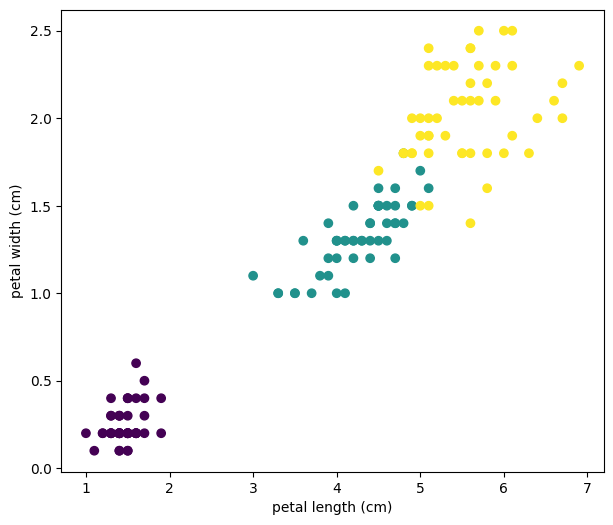

In [39]:
# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

#### In this problem, you'll use support vector machines to classify the Iris data

#### The following function helps you plot the decision boundary.

In [40]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

#### Exercise 1. Split the data into training set and test set.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

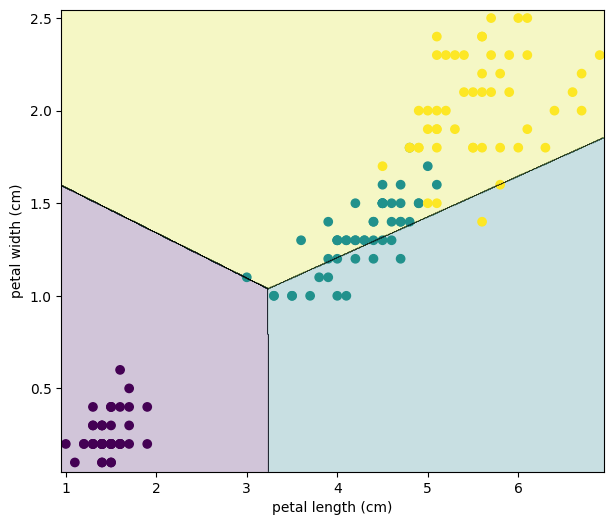

In [42]:
linsvm = LinearSVC(C=0.1)
linsvm.fit(X_train, y_train)
plot_decision_boundary(linsvm,X, y)

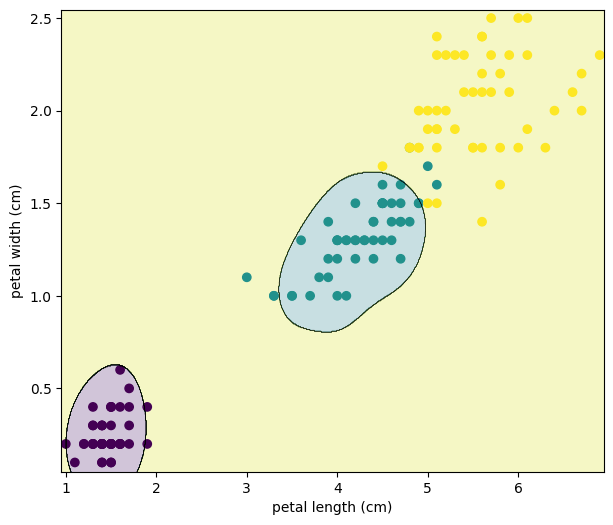

In [43]:
svm = SVC(C=0.1, kernel='rbf', gamma=10)
svm.fit(X_train, y_train)
plot_decision_boundary(svm, X, y)

#### Exercise 2. Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to set `loss='hinge'`.

#### Try different values of the tradeoff parameter: `C = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `C` on the decision boundary?

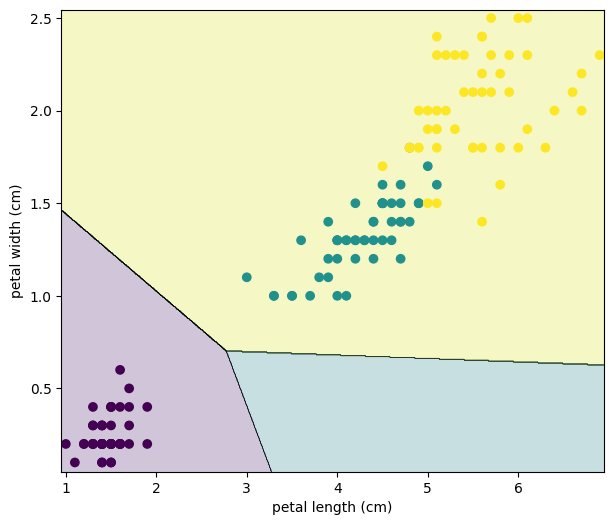

In [44]:
linsvm = LinearSVC(C=0.01)
linsvm.fit(X_train, y_train)
plot_decision_boundary(linsvm,X, y)

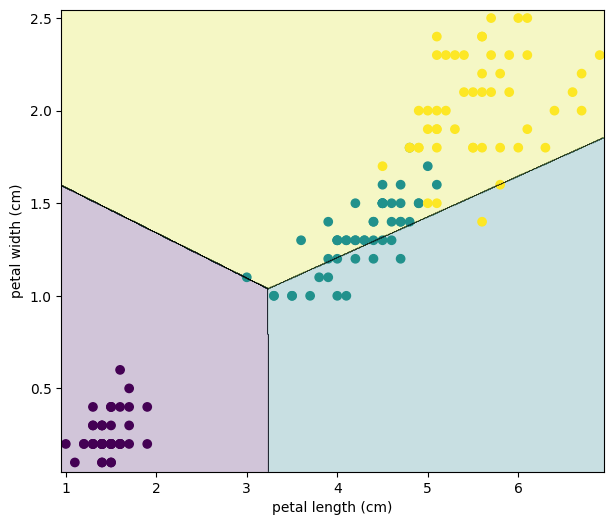

In [45]:
linsvm = LinearSVC(C=0.1)
linsvm.fit(X_train, y_train)
plot_decision_boundary(linsvm,X, y)

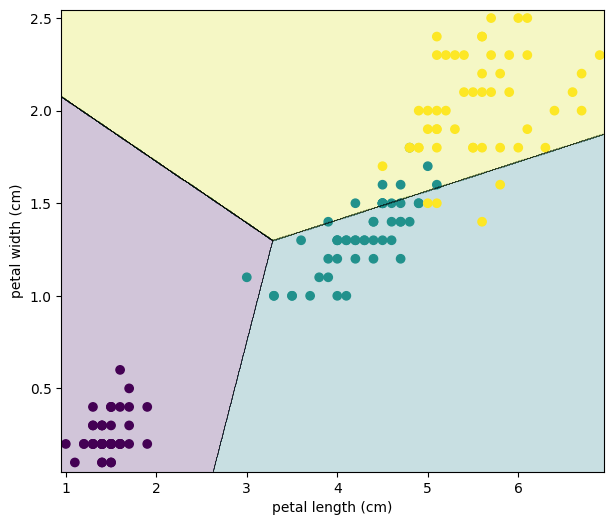

In [46]:
linsvm = LinearSVC(C=1.0)
linsvm.fit(X_train, y_train)
plot_decision_boundary(linsvm,X, y)

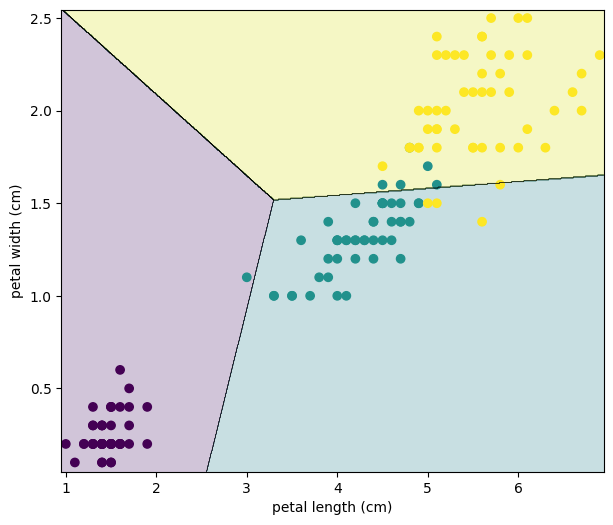

In [47]:
linsvm = LinearSVC(C=10.0)
linsvm.fit(X_train, y_train)
plot_decision_boundary(linsvm,X, y)

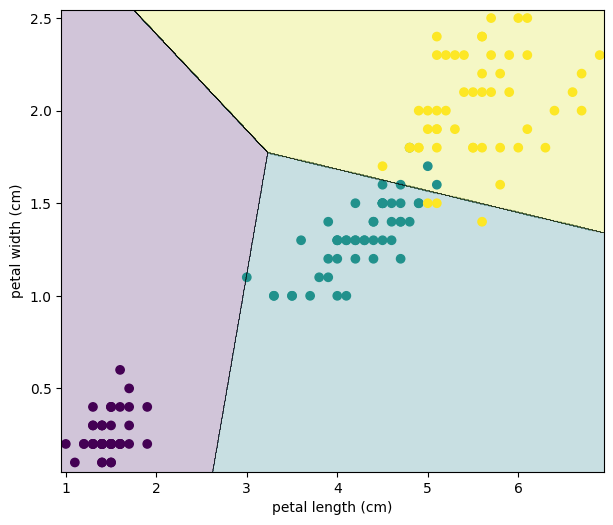

In [48]:
linsvm = LinearSVC(C=100.0)
linsvm.fit(X_train, y_train)
plot_decision_boundary(linsvm,X, y)

#### Exercise 3. Pick a value of `C` that you like. Then report the test error.

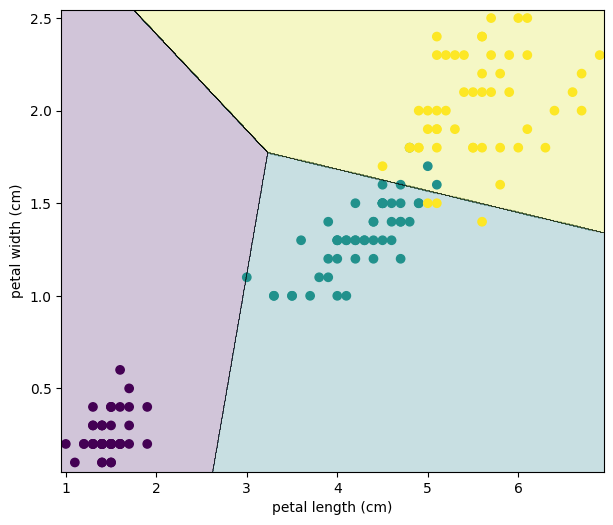

In [49]:
linsvm = LinearSVC(C=100.0)
linsvm.fit(X_train, y_train)
plot_decision_boundary(linsvm,X, y)

In [50]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = linsvm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
test_error = 1 - accuracy

print(f"Test Accuracy = {accuracy:.4f}")
print(f"Test Error (error rate) = {test_error:.4f}")

print(classification_report(y_test, y_pred))

Test Accuracy = 0.9556
Test Error (error rate) = 0.0444
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      0.94      0.94        17
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



#### Exercise 4. Now try kernel SVM with a quadratic kernel. You can do this with sklearn.svm.SVC, setting `kernel='rbf'` and `C = 1.0`.

#### Try different values of the tradeoff parameter: `gamma = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `gamma` on the decision boundary?

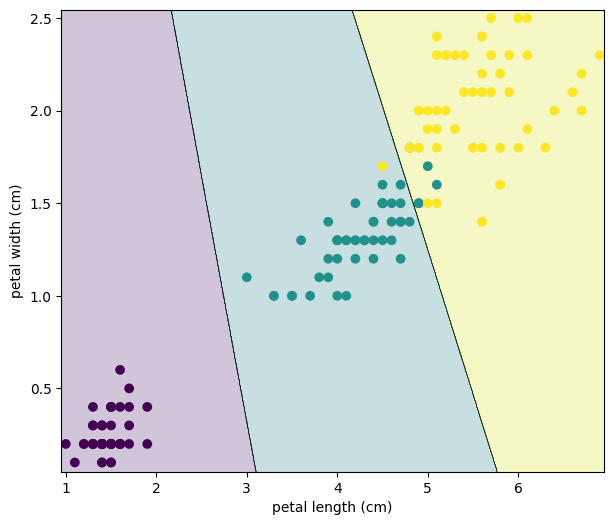

In [51]:
svm = SVC(C=1.0, kernel='rbf', gamma=0.01)
svm.fit(X_train, y_train)
plot_decision_boundary(svm, X, y)

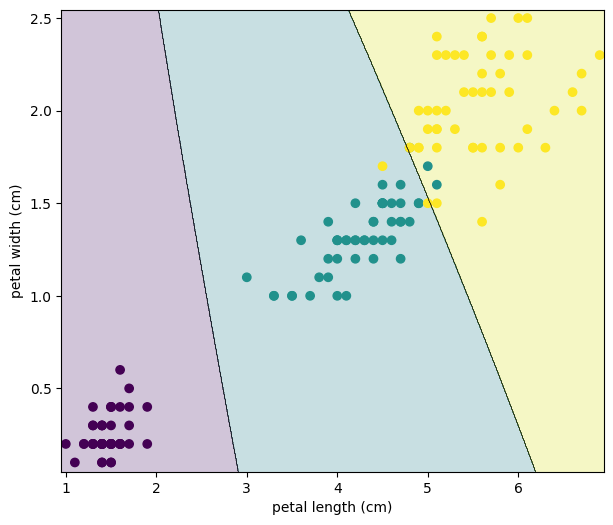

In [52]:
svm = SVC(C=1.0, kernel='rbf', gamma=0.1)
svm.fit(X_train, y_train)
plot_decision_boundary(svm, X, y)

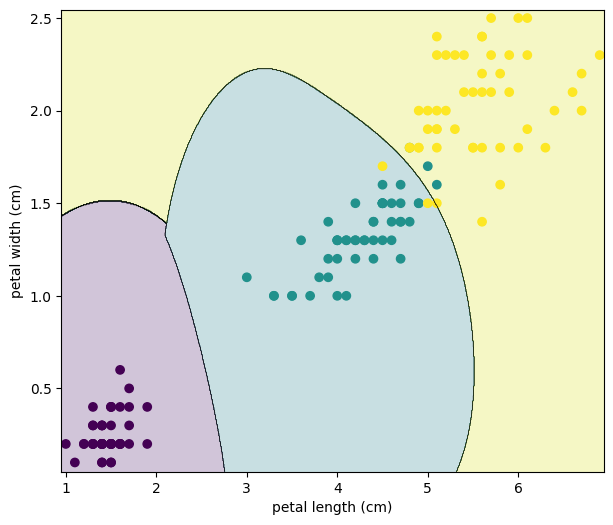

In [53]:
svm = SVC(C=1.0, kernel='rbf', gamma=1.0)
svm.fit(X_train, y_train)
plot_decision_boundary(svm, X, y)

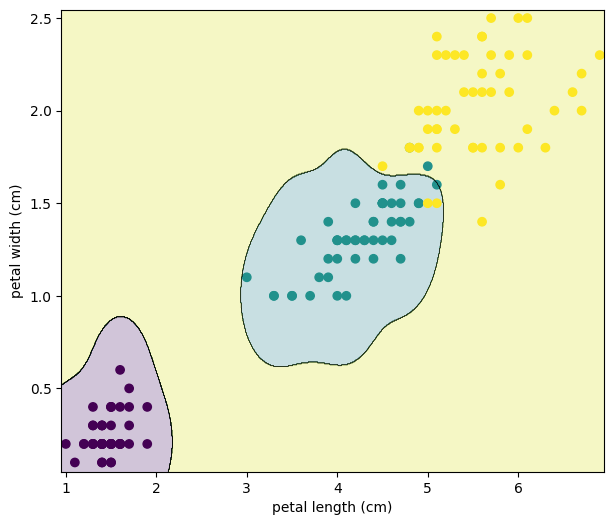

In [54]:
svm = SVC(C=1.0, kernel='rbf', gamma=10.0)
svm.fit(X_train, y_train)
plot_decision_boundary(svm, X, y)

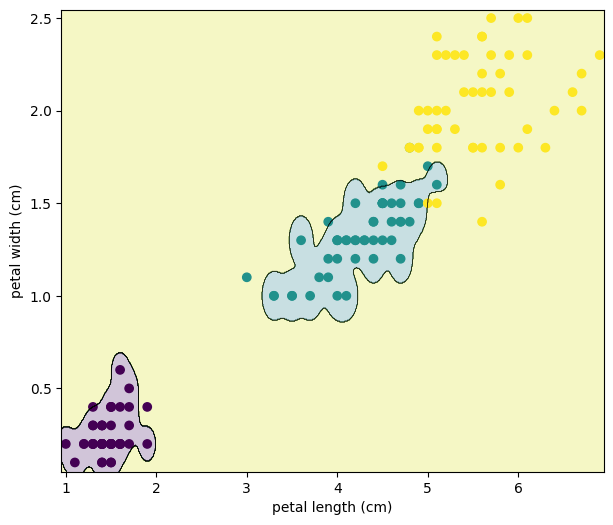

In [55]:
svm = SVC(C=1.0, kernel='rbf', gamma=100.0)
svm.fit(X_train, y_train)
plot_decision_boundary(svm, X, y)

#### Exercise 5. Pick a value of `gamma` that you like. Then report the test error and the number of support vectors.

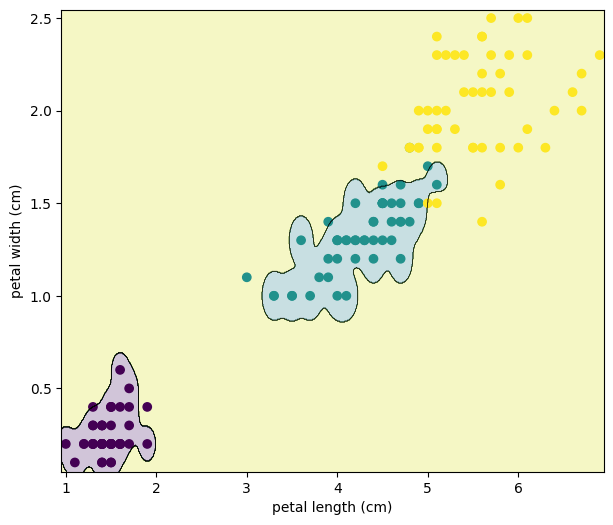

In [56]:
svm = SVC(C=1.0, kernel='rbf', gamma=100.0)
svm.fit(X_train, y_train)
plot_decision_boundary(svm, X, y)

In [57]:
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
test_error = 1 - accuracy

print(f"Test Accuracy = {accuracy:.4f}")
print(f"Test Error (error rate) = {test_error:.4f}")

print(classification_report(y_test, y_pred))

Test Accuracy = 0.8889
Test Error (error rate) = 0.1111
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       1.00      0.76      0.87        17
           2       0.75      1.00      0.86        15

    accuracy                           0.89        45
   macro avg       0.92      0.90      0.89        45
weighted avg       0.92      0.89      0.89        45



#### Exercise 6. Between Linear SVM and Kernel SVM, which model would you prefer to use for classification of Iris data?
1. Explain using test accuracy
2. Explaing using decision boundary plot

1. เลือกใช้โมเดล LinearSVM เนื่องจากมีค่า test acuracy = 0.96
ซึ่งมากกว่าโมเดล Kernel SVM ที่มีค่า test acuracy = 0.89

2. กราฟของ Linear SVM จะเห็นว่าแบ่งกลุ่มได้ค่อนข้างชัดเจนเมื่อค่า C มากขึ้น แต่กราฟของ Kernel เมื่อค่า gamma มากขึ้นทำให้วงล้อมรอบลดขนาดลงแต่ก็ไม่ได้เพิ่มความแม่นยำขึ้นเลย